# Decision Trees

To display decision trees, you need to install pydot and pydotplus:

<code>conda install pydot
pip install pydotplus
</code>

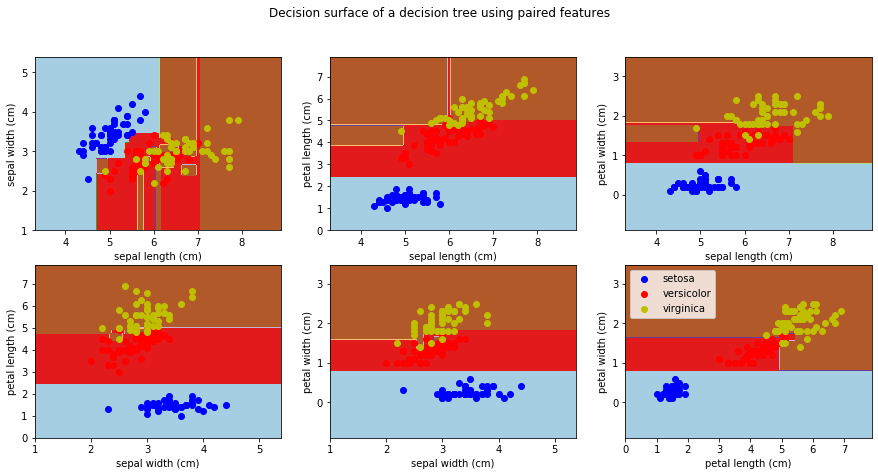

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn import tree 

# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris()

plt.figure(figsize=[15,7])

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = tree.DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing, tree
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
X = df.iloc[0:100, [0,1]].values
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=5)

In [22]:
dtc = tree.DecisionTreeClassifier(criterion='entropy')#, max_depth=3)
dtc.fit(X_train, y_train)
predicted = dtc.predict(X_test)

print("Decision Tree Results\nConfusion Matrix: ")
print(confusion_matrix(y_test,predicted))
print("\n Classifcation Report")
print(classification_report(y_test,predicted))

Decision Tree Results
Confusion Matrix: 
[[13  0]
 [ 0  7]]

 Classifcation Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



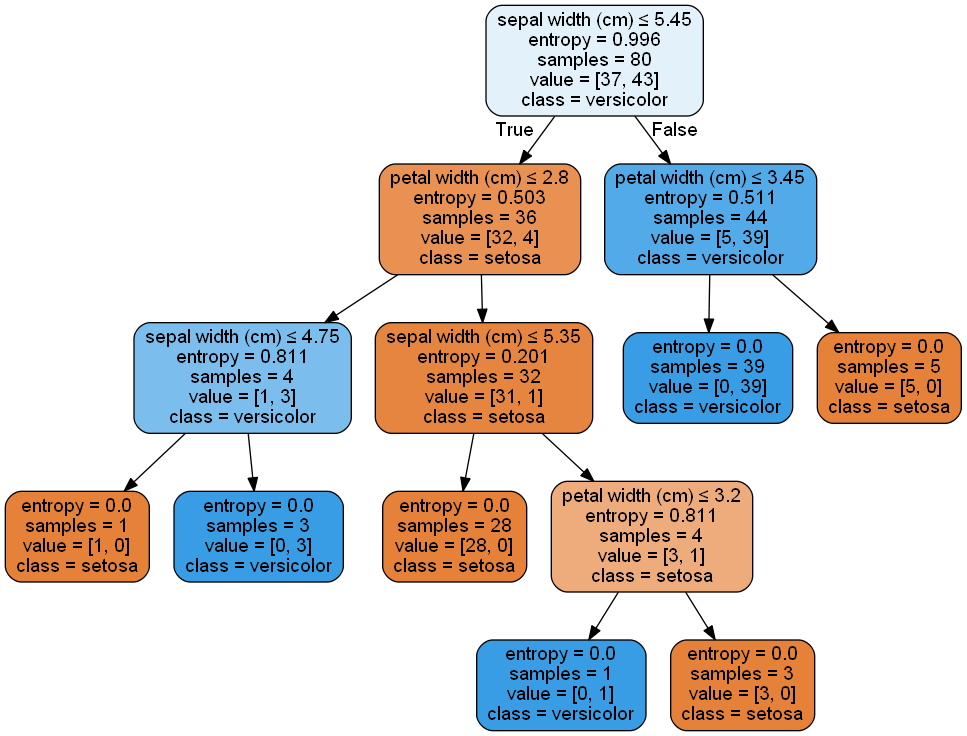

In [24]:
feature_names = [#'sepal length (cm)',
 'sepal width (cm)',
 #'petal length (cm)',
 'petal width (cm)']

target_names = ['setosa', 'versicolor', 'virginica']

import pydotplus 
from sklearn.externals.six import StringIO
from IPython.display import Image
dot_data = StringIO()
tree.export_graphviz(dtc, out_file=dot_data,
                          feature_names=feature_names,  
                          class_names=target_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())  

## KDD Cup Dataset

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split


from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2,l1
from keras.optimizers import SGD
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

np.random.seed = 47

data = pd.read_csv('kddcup.data_10_percent.csv',header=None)
dataCols = ['duration','protocol_type','service','flag','src_bytes','dst_bytes',
    'land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised',
    'root_shell','su_attempted','num_root','num_file_creations','num_shells',
    'num_access_files','num_outbound_cmds','is_host_login','is_guest_login',
    'count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate',
    'same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count',
    'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
    'dst_host_rerror_rate','dst_host_srv_rerror_rate','target']
data.columns = dataCols

print("Shape: ", data.shape)
data = data.reindex(np.random.permutation(data.index)).reset_index(drop=True)

target = data['target'].copy()
data = data.drop('target', axis=1)

discreteCols = ['protocol_type','service','flag']
dataDummies = pd.get_dummies(data[discreteCols])
data = data.drop(discreteCols, axis=1)

data = dataDummies.join(data)

target[target != 'normal.'] = 'abnormal'
target[target == 'normal.'] = 'normal'
print("Targets: ", target.unique())

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.5, random_state=50)

X_train = X_train.reset_index(drop=True)
X_test  = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test  = y_test.reset_index(drop=True)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

Shape:  (494021, 42)
Targets:  ['abnormal' 'normal']
(247010, 118)
(247010,)
(247011, 118)
(247011,)


In [26]:
dtc = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
dtc.fit(X_train, y_train)
predicted = dtc.predict(X_test)

print("Decision Tree Results\nConfusion Matrix: ")
print(confusion_matrix(y_test,predicted))
print("\n Classifcation Report")
print(classification_report(y_test,predicted))

Decision Tree Results
Confusion Matrix: 
[[197876    599]
 [   747  47789]]

 Classifcation Report
              precision    recall  f1-score   support

    abnormal       1.00      1.00      1.00    198475
      normal       0.99      0.98      0.99     48536

    accuracy                           0.99    247011
   macro avg       0.99      0.99      0.99    247011
weighted avg       0.99      0.99      0.99    247011



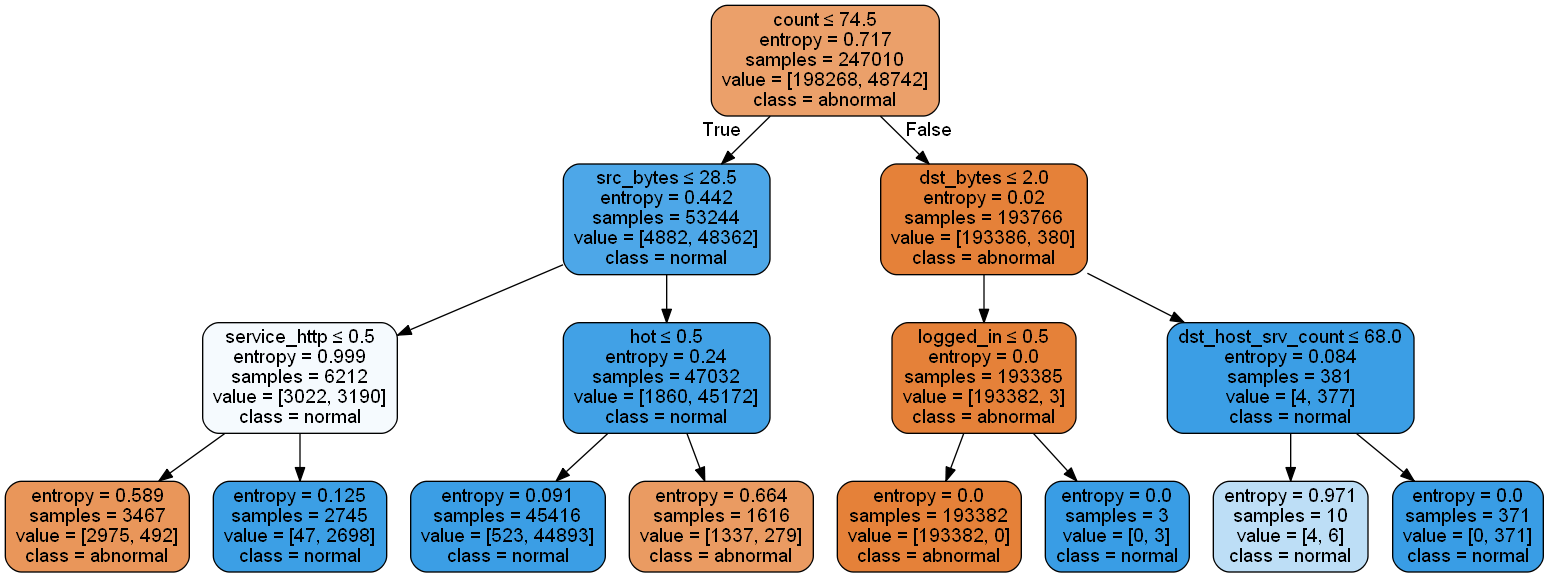

In [27]:
import pydotplus 
from sklearn.externals.six import StringIO
from IPython.display import Image
dot_data = StringIO()
tree.export_graphviz(dtc, out_file=dot_data,
                          feature_names=X_train.columns,  
                          class_names=['abnormal','normal'],  
                          filled=True, rounded=True,  
                          special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())  

## Decision Tree Regression

In [28]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing


advertising = pd.read_csv('Advertising.csv',usecols=(1,2,3,4))

X = np.array(advertising['TV']).reshape(-1,1)
y = np.array(advertising['Sales'])

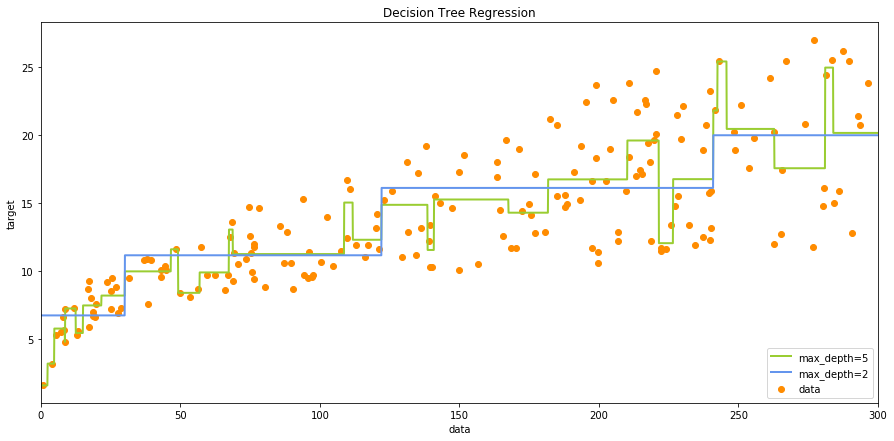

In [29]:
# Fit regression model
regr_1 = tree.DecisionTreeRegressor(max_depth=2)
regr_2 = tree.DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 300, 0.1)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize=[15,7])
plt.scatter(X, y, c="darkorange", label="data")
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.xlim([0,300])
plt.title("Decision Tree Regression")
plt.legend(loc='lower right')
plt.show()

## Voting Classifier

In [33]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

iris = datasets.load_iris()
X_iris, y_iris = iris.data[:, 1:3], iris.target

clf1 = LogisticRegression(random_state=1,solver='lbfgs',multi_class='auto')
clf2 = RandomForestClassifier(random_state=1,n_estimators=10)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X_iris, y_iris, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.95 (+/- 0.04) [Logistic Regression]
Accuracy: 0.93 (+/- 0.05) [Random Forest]
Accuracy: 0.91 (+/- 0.04) [naive Bayes]
Accuracy: 0.95 (+/- 0.04) [Ensemble]


# Decision Trees and Gridsearch

### Predict a biological response of molecules from their chemical properties

In order to use this data, you must <a href="https://www.kaggle.com/c/bioresponse">download it</a> directly from Kaggle.


"The objective of the competition is to help us build as good a model as possible so that we can, as optimally as this data allows, relate molecular information, to an actual biological response.

Each row in this data set represents a molecule. The first column contains experimental data describing an actual biological response; the molecule was seen to elicit this response (1), or not (0). The remaining columns represent molecular descriptors (d1 through d1776), these are calculated properties that can capture some of the characteristics of the molecule - for example size, shape, or elemental constitution. The descriptor matrix has been normalized."



In [35]:
import pandas as pd

data = pd.read_csv("train.csv")
target = data['Activity'].copy()
data = data.drop('Activity',axis=1)
data.head()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,...,0,0,0,0,0,0,0,0,0,0
1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,...,1,1,1,1,0,1,0,0,1,0
2,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,...,0,0,0,0,0,0,0,0,0,0
4,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,...,0,0,0,0,0,0,0,0,0,0


In [38]:
print(target.loc[0:4])

0    1
1    1
2    1
3    1
4    0
Name: Activity, dtype: int64


In [40]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.5, random_state=50)

In [43]:
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import tree

max_depths = range(1,30,1)

dtc = tree.DecisionTreeClassifier(criterion='entropy')
grid = GridSearchCV(estimator=dtc, param_grid=dict(max_depth=max_depths),cv=3)
grid.fit(X_train, y_train)

print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.max_depth)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 30)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scor

In [45]:
predicted = grid.predict(X_test)

print("Decision Tree Results\nConfusion Matrix: ")
print(confusion_matrix(y_test,predicted))
print("\n Classifcation Report")
print(classification_report(y_test,predicted))

Decision Tree Results
Confusion Matrix: 
[[636 245]
 [217 778]]

 Classifcation Report
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       881
           1       0.76      0.78      0.77       995

    accuracy                           0.75      1876
   macro avg       0.75      0.75      0.75      1876
weighted avg       0.75      0.75      0.75      1876



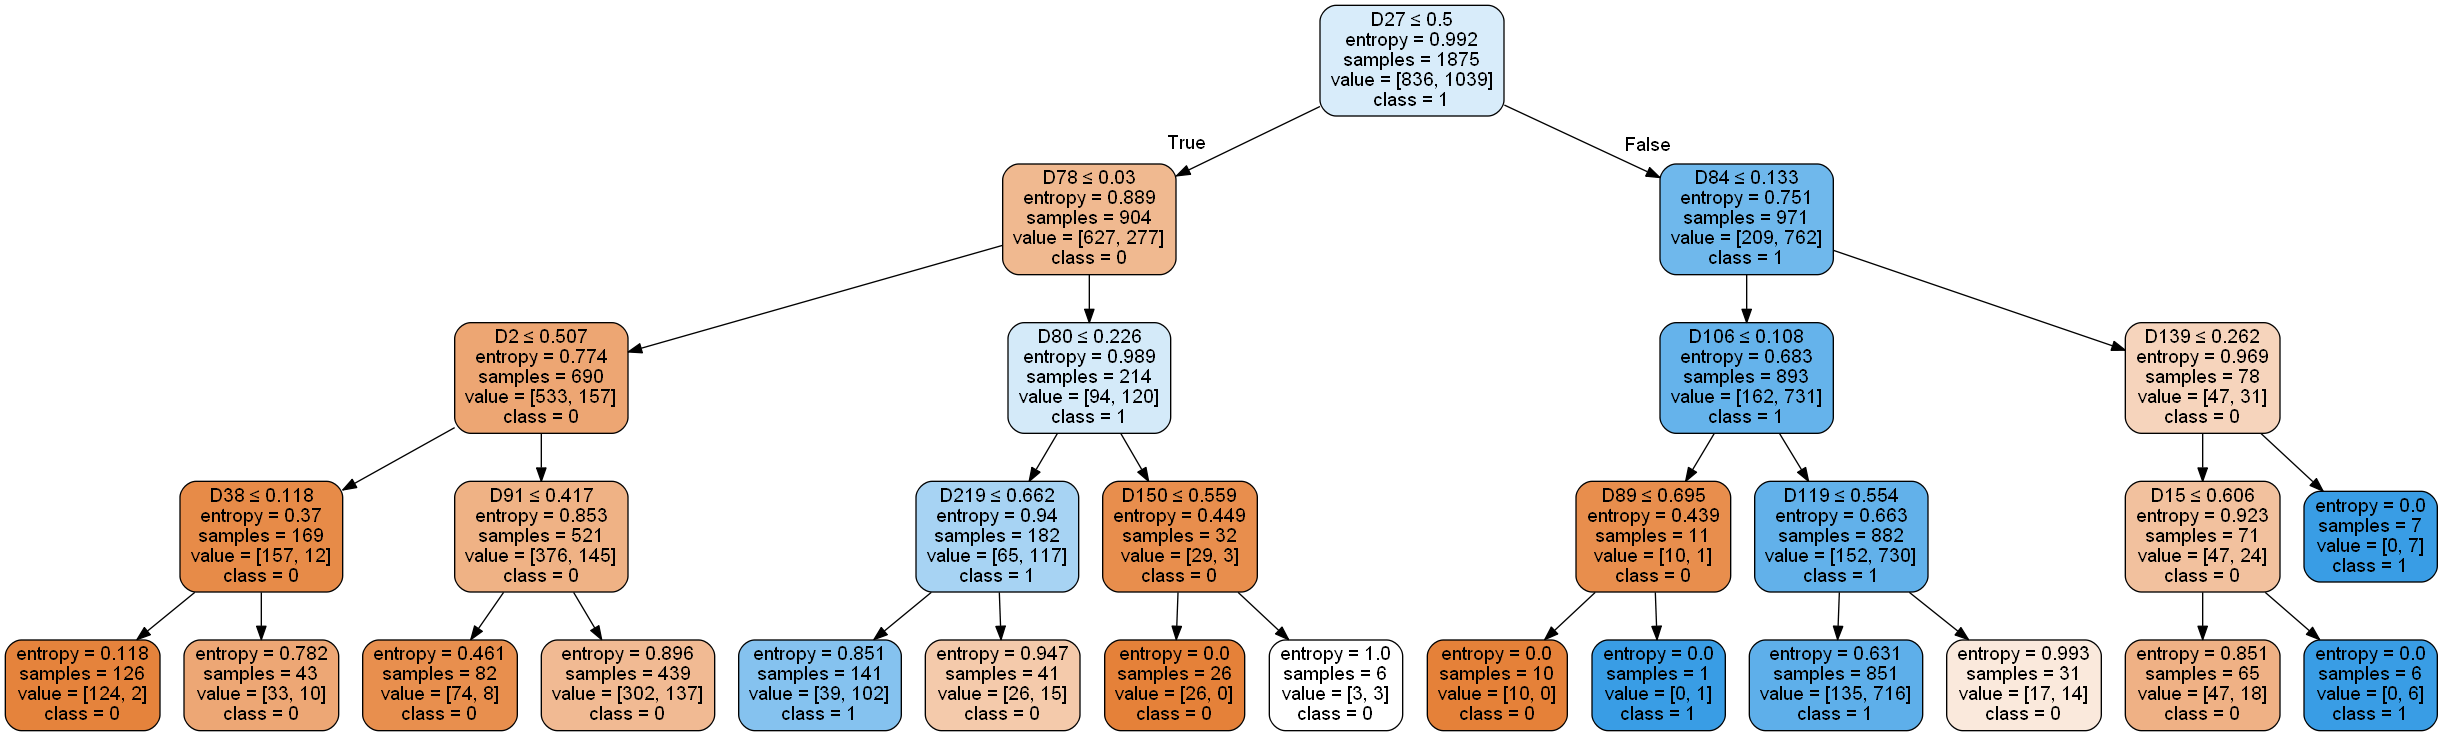

In [46]:
import pydotplus 
from sklearn.externals.six import StringIO
from IPython.display import Image
dot_data = StringIO()
tree.export_graphviz(grid.best_estimator_, out_file=dot_data,
                          feature_names=X_train.columns,  
                          class_names=['0','1'],  
                          filled=True, rounded=True,  
                          special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())  

# Random Forests

In [49]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV

n_estimators_list = [5,10,50,100,200,300,400,1000]

rfc = RandomForestClassifier(random_state=47)
grid = GridSearchCV(estimator=rfc, param_grid=dict(n_estimators=n_estimators_list),cv=3)
grid.fit(X_train, y_train)

print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.n_estimators)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=47,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [51]:
predicted = grid.predict(X_test)

print("Decision Tree Results\nConfusion Matrix: ")
print(confusion_matrix(y_test,predicted))
print("\n Classifcation Report")
print(classification_report(y_test,predicted))

Decision Tree Results
Confusion Matrix: 
[[641 240]
 [181 814]]

 Classifcation Report
              precision    recall  f1-score   support

           0       0.78      0.73      0.75       881
           1       0.77      0.82      0.79       995

    accuracy                           0.78      1876
   macro avg       0.78      0.77      0.77      1876
weighted avg       0.78      0.78      0.77      1876



# Extra Randomized Trees

In [52]:
from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV


n_estimators_list = [5,10,50,100,200,300,400,1000]

etc = ExtraTreesClassifier(random_state=47)
grid = GridSearchCV(estimator=etc, param_grid=dict(n_estimators=n_estimators_list),cv=3)
grid.fit(X_train, y_train)

print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.n_estimators)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None,
                                            criterion='gini', max_depth=None,
                                            max_features='auto',
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators='warn', n_jobs=None,
                                            oob_score=False, random_state=47,
                                            verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'n_estimators': [5, 10, 

In [53]:
predicted = grid.predict(X_test)

print("Decision Tree Results\nConfusion Matrix: ")
print(confusion_matrix(y_test,predicted))
print("\n Classifcation Report")
print(classification_report(y_test,predicted))

Decision Tree Results
Confusion Matrix: 
[[639 242]
 [192 803]]

 Classifcation Report
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       881
           1       0.77      0.81      0.79       995

    accuracy                           0.77      1876
   macro avg       0.77      0.77      0.77      1876
weighted avg       0.77      0.77      0.77      1876



# Gradient Boosting Classifier

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=47)

n_estimators_list = [5,10,50,100,200,300,400,1000]
grid = GridSearchCV(estimator=gbc, param_grid=dict(n_estimators=n_estimators_list),cv=3)
grid.fit(X_train, y_train)

print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.n_estimators)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [55]:
predicted = grid.predict(X_test)

print("Decision Tree Results\nConfusion Matrix: ")
print(confusion_matrix(y_test,predicted))
print("\n Classifcation Report")
print(classification_report(y_test,predicted))

Decision Tree Results
Confusion Matrix: 
[[636 245]
 [161 834]]

 Classifcation Report
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       881
           1       0.77      0.84      0.80       995

    accuracy                           0.78      1876
   macro avg       0.79      0.78      0.78      1876
weighted avg       0.78      0.78      0.78      1876



# Interpretation of Ensembles: Feature Importance

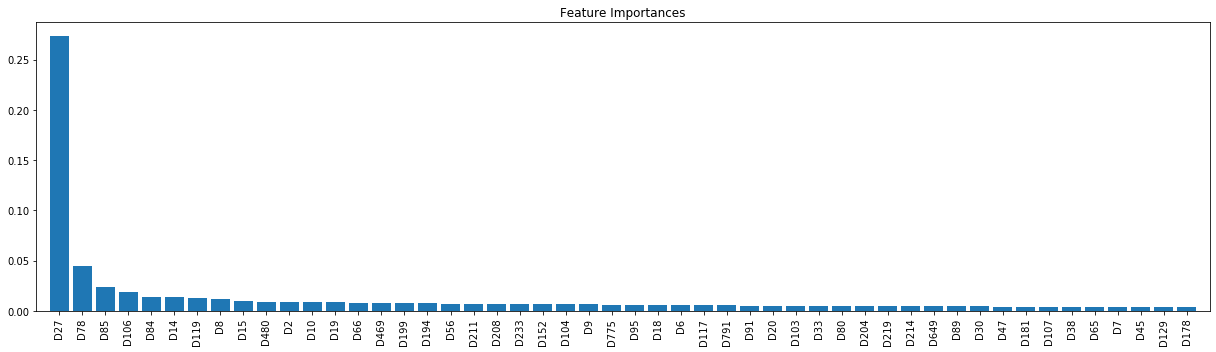

In [56]:
importances = grid.best_estimator_.feature_importances_

indices = np.argsort(importances)[::-1]
feat_labels = data.columns

plt.figure(figsize=[17,5])

plt.title('Feature Importances')
plt.bar(range(50), 
        importances[indices][0:50],
        align='center')

plt.xticks(range(50), 
           feat_labels[indices][0:50], rotation=90)

plt.xlim([-1,50])
plt.tight_layout()

plt.show()